In [1]:
### all together ########################
import stanza
import spacy
import glob
import pandas as pd

import stanza.pipeline
stanza.download('en')
nlp_stanza = stanza.Pipeline('en', processors='tokenize,ner') 
nlp_spacy = spacy.load('en_core_web_sm')

path_journalists = './Biographies/Biographies_Journalists/*.txt'
files_journalists = glob.glob(path_journalists)

path_sculptors = './Biographies/Biographies_Sculptors/*.txt'
files_sculptors = glob.glob(path_sculptors)

C:\Users\abiga\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


2024-06-14 18:46:24 INFO: Downloaded file to C:\Users\abiga\stanza_resources\resources.json
2024-06-14 18:46:24 INFO: Downloading default packages for language: en (English) ...
2024-06-14 18:46:27 INFO: File exists: C:\Users\abiga\stanza_resources\en\default.zip
2024-06-14 18:46:35 INFO: Finished downloading models and saved to C:\Users\abiga\stanza_resources
2024-06-14 18:46:35 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-06-14 18:46:36 INFO: Downloaded file to C:\Users\abiga\stanza_resources\resources.json
2024-06-14 18:46:36 WARNING: Language en package default expects mwt, which has been added
2024-06-14 18:46:36 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

2024-06-14 18:46:36 INFO: Using device: cpu
2024-06-14 18:46:36 INFO: Loading: tokenize
2024-06-14 18:46:41 INFO: Loading: mwt
2024-06-14 18:46:41 INFO: Loading: ner
2024-06-14 18:46:42 INFO: Done loading processors!


In [ ]:
def extract_ents_stanza(file):
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
        doc = nlp_stanza(content)
        ents = [(ent.text, ent.type) for ent in doc.ents]
    return ents

def extract_ents_spacy(file):
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
        doc = nlp_spacy(content)
        ents = [(ent.text, ent.label_) for ent in doc.ents]
    return ents

def store_ents(files):
    data = []
    for file in files:
        file_name = file.split('/')[-1]
        data.append({'file_name': file_name, 
                     'ents_stanza': extract_ents_stanza(file), 
                     'ents_spacy': extract_ents_spacy(file)})
    return data

data_journalists = store_ents(files_journalists)
df_journalists = pd.DataFrame(data_journalists)
df_journalists.head()
df_journalists.to_csv('ents_journalists.csv', index=False) 

data_sculptors = store_ents(files_journalists)
df_sculptors = pd.DataFrame(data_sculptors)
df_sculptors.head()
df_sculptors.to_csv('ents_sculptors.csv', index=False) 


In [ ]:
import numpy as np

nb_ents_journalists_stanza = [len(ents) for ents in df_journalists['ents_stanza']]
nb_ents_journalists_spacy = [len(ents) for ents in df_journalists['ents_spacy']]
nb_ents_sculptors_stanza = [len(ents) for ents in df_sculptors['ents_stanza']]
nb_ents_sculptors_spacy = [len(ents) for ents in df_sculptors['ents_spacy']]

nb_ents_journalists_stanza = df_journalists['ents_stanza'].apply(len)
nb_ents_journalists_spacy = df_journalists['ents_spacy'].apply(len)
nb_ents_sculptors_stanza = df_sculptors['ents_stanza'].apply(len)
nb_ents_sculptors_spacy = df_sculptors['ents_spacy'].apply(len)

nb_ents_list = [nb_ents_journalists_stanza,nb_ents_journalists_spacy,nb_ents_sculptors_stanza,nb_ents_sculptors_spacy]

avg_nb_ents = [np.mean(list) for list in nb_ents_list]
min_nb_ents = [np.min(list) for list in nb_ents_list]
max_nb_ents = [np.max(list) for list in nb_ents_list]


nb_words_journalists_spacy = [len(ent[0]) for ent in [ents for ents in df_journalists['ents_stanza']]]
nb_words_journalists_spacy = [len(ent[0]) for ent in [ents for ents in df_journalists['ents_spacy']]]
nb_words_sculptors_stanza = [len(ent[0]) for ent in [ents for ents in df_sculptors['ents_stanza']]]
nb_words_sculptors_spacy = [len(ent[0]) for ent in [ents for ents in df_sculptors['ents_spacy']]]

nb_words_list = [nb_words_journalists_spacy,nb_words_journalists_spacy,nb_words_sculptors_stanza,nb_words_sculptors_spacy]

avg_nb_words = [np.mean(list) for list in nb_words_list]
min_nb_words = [np.min(list) for list in nb_words_list]
max_nb_words = [np.max(list) for list in nb_words_list]

data = {"category" : ["Journalists","Journalists","Sculptors","Sculptors"],
                "package" : ["stanza","spacy","stanza","spacy"],
                "avg_nb_ents" : avg_nb_ents,
                "min_nb_ents" : min_nb_ents,
                "max_nb_ents" : max_nb_ents,
                "avg_nb_words" : avg_nb_words,
                "min_nb_words" : min_nb_words,
                "max_nb_words" : max_nb_words}
                

df_statistics = pd.DataFrame(data)
df_statistics.head()

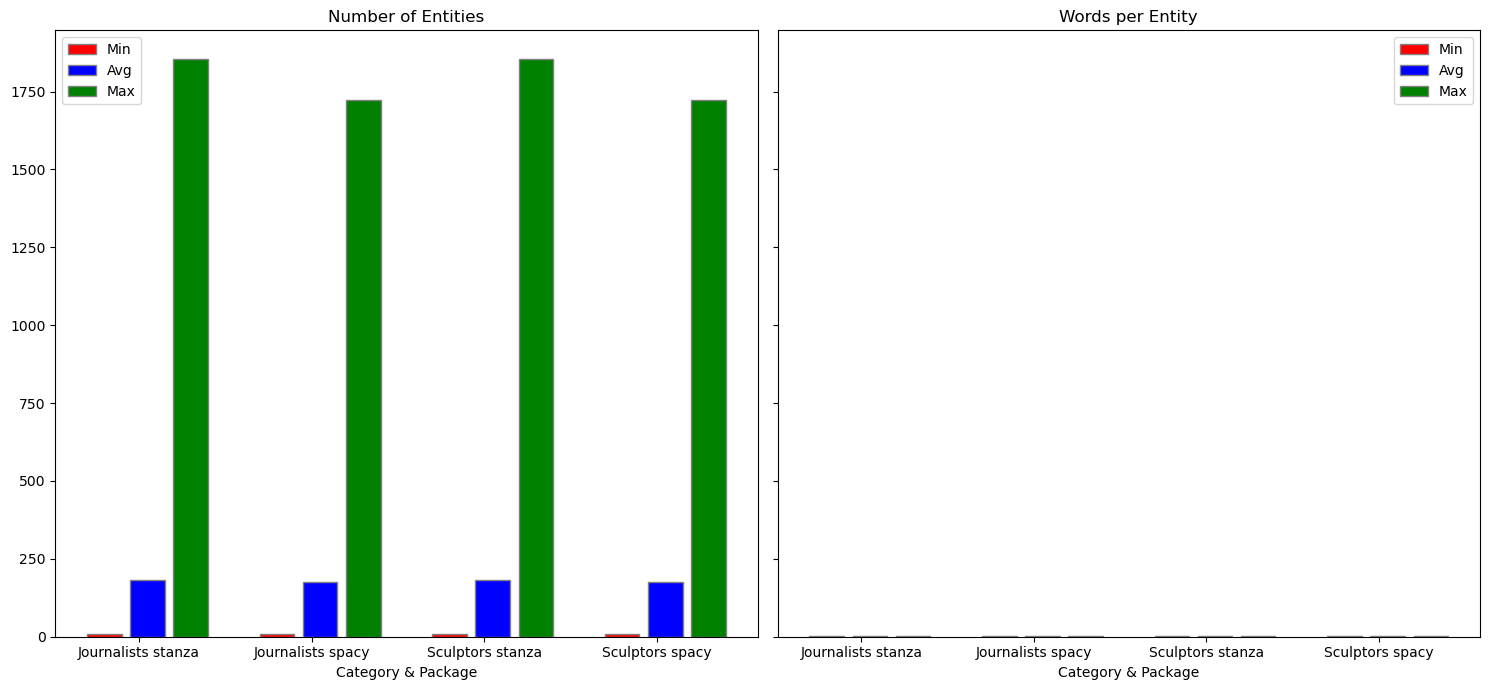

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

bar_width = 0.2
bar_spacing = 0.05

r1 = np.arange(len(df_statistics))
r2 = [x + bar_width + bar_spacing for x in r1]
r3 = [x + 2*(bar_width + bar_spacing) for x in r1]

axes[0].bar(r1, df_statistics['min_nb_ents'], color='red', width=bar_width, edgecolor='grey', label='Min')
axes[0].bar(r2, df_statistics['avg_nb_ents'], color='blue', width=bar_width, edgecolor='grey', label='Avg')
axes[0].bar(r3, df_statistics['max_nb_ents'], color='green', width=bar_width, edgecolor='grey', label='Max')

axes[0].set_xlabel('Category & Package')
axes[0].set_title('Number of Entities')
axes[0].set_xticks([r + bar_width for r in range(len(df_statistics))])
axes[0].set_xticklabels(df_statistics['category'] + ' ' + df_statistics['package'])
axes[0].legend()


axes[1].bar(r1, df_statistics['min_nb_words'], color='red', width=bar_width, edgecolor='grey', label='Min')
axes[1].bar(r2, df_statistics['avg_nb_words'], color='blue', width=bar_width, edgecolor='grey', label='Avg')
axes[1].bar(r3, df_statistics['max_nb_words'], color='green', width=bar_width, edgecolor='grey', label='Max')

axes[1].set_xlabel('Category & Package')
axes[1].set_title('Words per Entity')
axes[1].set_xticks([r + bar_width for r in range(len(df_statistics))])
axes[1].set_xticklabels(df_statistics['category'] + ' ' + df_statistics['package'])
axes[1].legend()

plt.tight_layout()
plt.show()

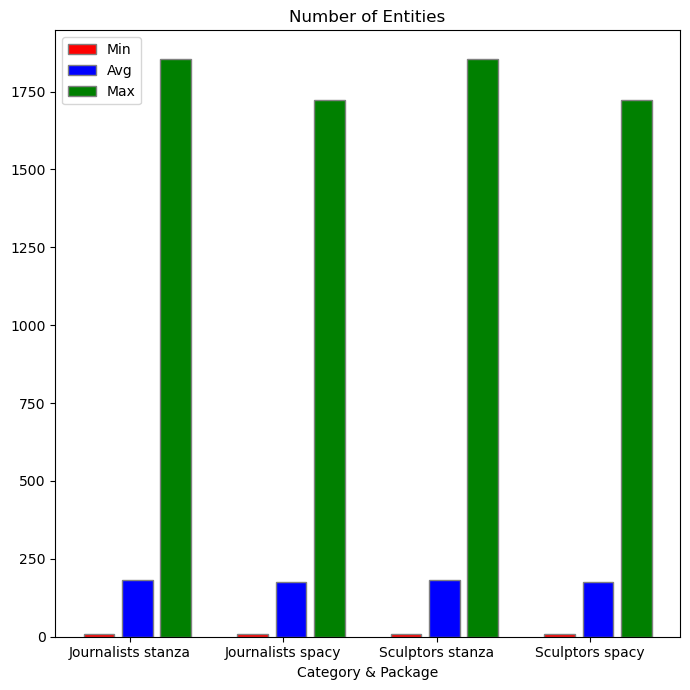

In [39]:
fig1, ax1 = plt.subplots(figsize=(7, 7))

bar_width = 0.2
bar_spacing = 0.05

r1 = np.arange(len(df_statistics))
r2 = [x + bar_width + bar_spacing for x in r1]
r3 = [x + 2*(bar_width + bar_spacing) for x in r1]

ax1.bar(r1, df_statistics['min_nb_ents'], color='red', width=bar_width, edgecolor='grey', label='Min')
ax1.bar(r2, df_statistics['avg_nb_ents'], color='blue', width=bar_width, edgecolor='grey', label='Avg')
ax1.bar(r3, df_statistics['max_nb_ents'], color='green', width=bar_width, edgecolor='grey', label='Max')

ax1.set_xlabel('Category & Package')
ax1.set_title('Number of Entities')
ax1.set_xticks([r + bar_width for r in range(len(df_statistics))])
ax1.set_xticklabels(df_statistics['category'] + ' ' + df_statistics['package'])
ax1.legend()

plt.tight_layout()
plt.show()

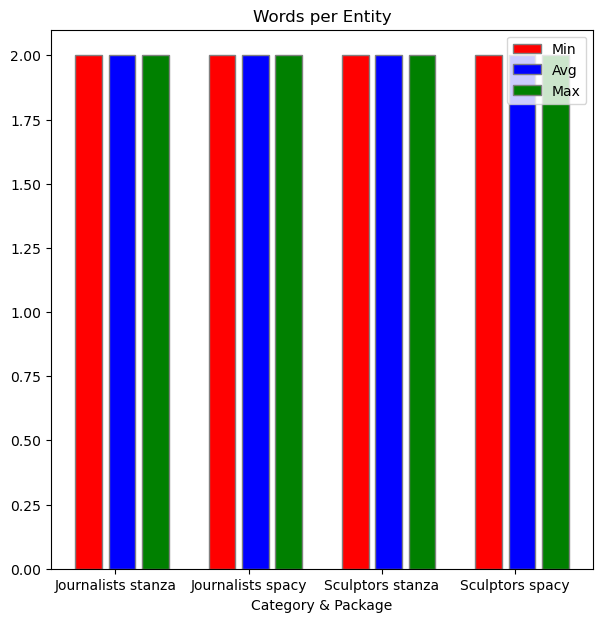

In [40]:
fig2, ax2 = plt.subplots(figsize=(7, 7))

bar_width = 0.2
bar_spacing = 0.05

r1 = np.arange(len(df_statistics))
r2 = [x + bar_width + bar_spacing for x in r1]
r3 = [x + 2*(bar_width + bar_spacing) for x in r1]

ax2.bar(r1, df_statistics['min_nb_words'], color='red', width=bar_width, edgecolor='grey', label='Min')
ax2.bar(r2, df_statistics['avg_nb_words'], color='blue', width=bar_width, edgecolor='grey', label='Avg')
ax2.bar(r3, df_statistics['max_nb_words'], color='green', width=bar_width, edgecolor='grey', label='Max')

ax2.set_xlabel('Category & Package')
ax2.set_title('Words per Entity')
ax2.set_xticks([r + bar_width for r in range(len(df_statistics))])
ax2.set_xticklabels(df_statistics['category'] + ' ' + df_statistics['package'])
ax2.legend()